In [1]:
!pip install transformers

In [2]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image

In [3]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

In [5]:
predict_step(['img6.jpg'])

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


['a green hillside with a mountain range']

In [6]:
# prompt: write code to Connect to drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
# prompt: code to read images from mydrive

import os

# Get the path to the My Drive folder
my_drive_path = "/content/drive/MyDrive/pictures"

# Get a list of all the files in the My Drive folder
files = os.listdir(my_drive_path)

# Get a list of all the images in the My Drive folder
images = [file for file in files if file.endswith(".jpg") or file.endswith(".png")]

# Print the list of images
print(images)


['img.jpg', 'img1.jpg', 'img2.jpg', 'img4.jpg', 'img5.jpg', 'img6.jpg', 'img6 - Copy.jpg', 'img8.jpg']


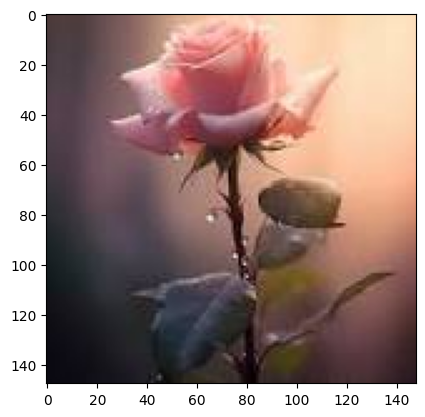

a pink rose in a white vase on a table


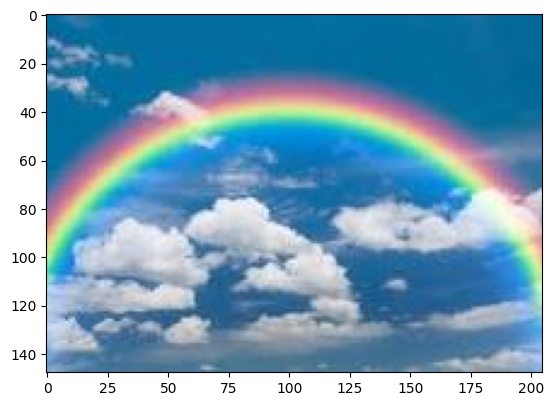

a blurry photo of a rainbow in the sky


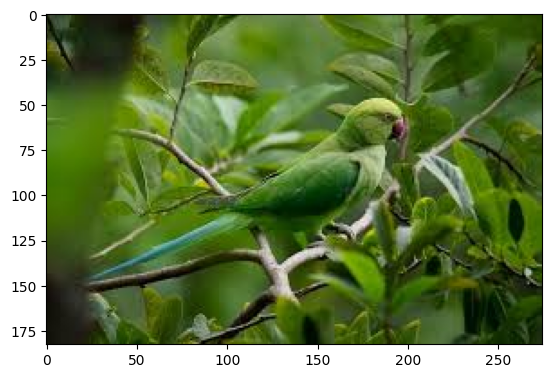

a green bird sitting on top of a tree branch


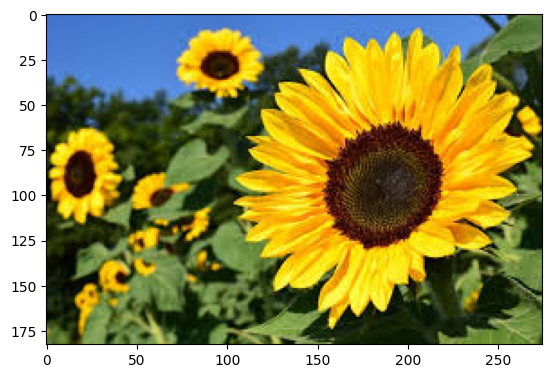

a close up view of a bunch of yellow flowers


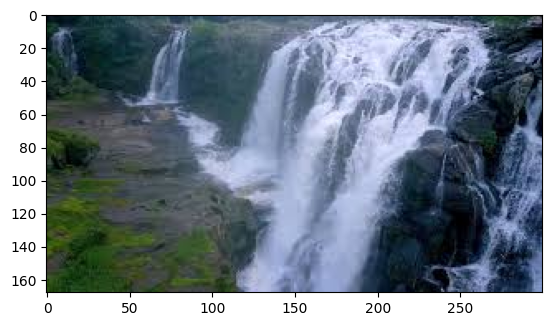

a river filled with lots of water surrounded by trees


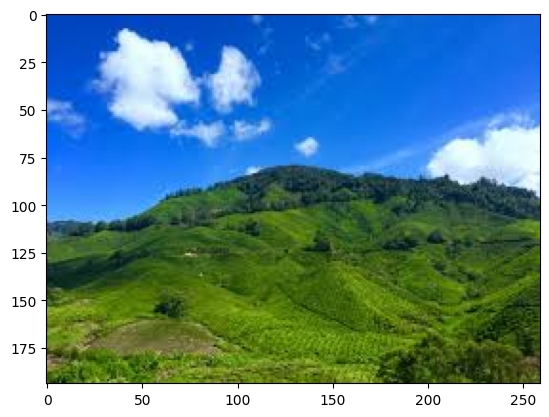

a green hillside with a mountain range


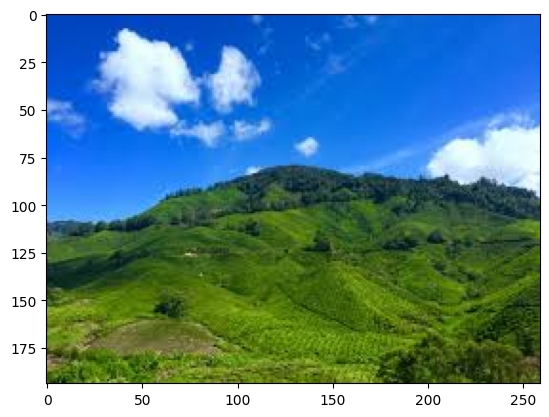

a green hillside with a mountain range


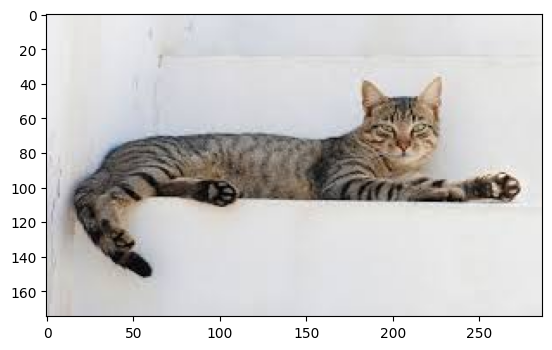

a cat sitting on a ledge looking out the window


In [8]:

# prompt: Code to display each image in images list and the caption for it alongside using predict_step(['img.jpeg']) method

import matplotlib.pyplot as plt
my_drive_path = "/content/drive/MyDrive/pictures"
img_caption = {}
for image in images:
  # Get the image path
  image_path = os.path.join(my_drive_path, image)

  # Display the image
  plt.imshow(plt.imread(image_path))
  plt.show()

  # Get the caption for the image
  caption = predict_step([image_path])[0]
  img_caption[image_path] = caption
  # Print the caption
  print(caption)


In [9]:
print(img_caption)

{'/content/drive/MyDrive/pictures/img.jpg': 'a pink rose in a white vase on a table', '/content/drive/MyDrive/pictures/img1.jpg': 'a blurry photo of a rainbow in the sky', '/content/drive/MyDrive/pictures/img2.jpg': 'a green bird sitting on top of a tree branch', '/content/drive/MyDrive/pictures/img4.jpg': 'a close up view of a bunch of yellow flowers', '/content/drive/MyDrive/pictures/img5.jpg': 'a river filled with lots of water surrounded by trees', '/content/drive/MyDrive/pictures/img6.jpg': 'a green hillside with a mountain range', '/content/drive/MyDrive/pictures/img6 - Copy.jpg': 'a green hillside with a mountain range', '/content/drive/MyDrive/pictures/img8.jpg': 'a cat sitting on a ledge looking out the window'}


In [10]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.6/974.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.6/315.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 6.6 MB/s eta 0:00:00


In [ ]:
!pip install langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 5.4 MB/s eta 0:00:00


In [11]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 3.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Caption embeddings shape: (8, 512)
FAISS index contains 8 items
Found 1 similar images for the query 'A picture of a rose'
Image: /content/drive/MyDrive/pictures/img.jpg, Distance: 51.5462


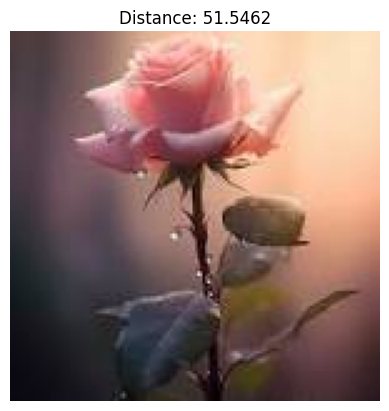

In [ ]:
import os
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import matplotlib.pyplot as plt
import faiss
import numpy as np

# Example img_caption dictionary, replace it with actual data
# img_caption = {
#     "/content/drive/MyDrive/pictures/sample1.jpg": "A picture of a cat sitting on a sofa",
#     "/content/drive/MyDrive/pictures/sample2.jpg": "A beautiful sunrise over the mountains",
# }

# Initialize the CLIP model and processor
model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to get text embeddings
def get_text_embedding(text):
    inputs = processor(text=text, return_tensors="pt", padding=True).to(device)
    with torch.no_grad():
        text_features = model.get_text_features(**inputs)
    return text_features.cpu().numpy()

# Function to get image embeddings
def get_image_embedding(image_path):
    image = Image.open(image_path)
    inputs = processor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        image_features = model.get_image_features(**inputs)
    return image_features.cpu().numpy()

# Generate and store embeddings for captions
captions = list(img_caption.values())
images = list(img_caption.keys())

caption_embeddings = np.vstack([get_text_embedding(caption) for caption in captions])

# Debug: Check shape and type of embeddings
print(f"Caption embeddings shape: {caption_embeddings.shape}")

# Prepare FAISS index
dimension = caption_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(caption_embeddings)

# Debug: Verify FAISS index size
print(f"FAISS index contains {index.ntotal} items")

# Function to search for similar images
def search_similar_images(query, k=1):
    query_embedding = get_text_embedding(query)
    distances, indices = index.search(query_embedding, k)

    similar_images = []
    for i, idx in enumerate(indices[0]):
        similar_images.append((images[idx], distances[0][i]))

    return similar_images

# Example query
query = "A picture of a rose"
similar_images = search_similar_images(query)

# Debug: Verify the results of the search
print(f"Found {len(similar_images)} similar images for the query '{query}'")

# Display the similar images
for image_path, distance in similar_images:
    print(f"Image: {image_path}, Distance: {distance:.4f}")
    if os.path.exists(image_path):  # Check if the image path exists
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')  # Hide axis
        plt.title(f"Distance: {distance:.4f}")  # Show the distance as title
        plt.show()
    else:
        print(f"Image path '{image_path}' does not exist.")


In [ ]:
!pip install langchain faiss-cpu transformers torch pillow matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 49.1 MB/s eta 0:00:00
